In [1]:
# What i am gonna finish
what_im_covering = [
    "0. An end - to -end  Scikit-Learn Workflow",
    "1.Getting the data ready",
    "2.  Choose the right estimator/algorithim for our platform ",
    "3. Fit the model/algorithm and use it to make pedictions on our data",
    "4. Evaluating the model.",
    "5. Improve the model",
    "6. Save and load a tarined model",
    "7. Putting it all together"
]
what_im_covering

['0. An end - to -end  Scikit-Learn Workflow',
 '1.Getting the data ready',
 '2.  Choose the right estimator/algorithim for our platform ',
 '3. Fit the model/algorithm and use it to make pedictions on our data',
 '4. Evaluating the model.',
 '5. Improve the model',
 '6. Save and load a tarined model',
 '7. Putting it all together']

## 0. An end-to-end Scikit-Learn Workflow 

In [2]:
# getting the data ready
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create x (feature matrix)
X = heart_disease.drop("target" , axis=1)

# create y labels
y=heart_disease["target"]

In [4]:
# choosing the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

#keeping the default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2


In [8]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [9]:
y_test

227    0
174    0
213    0
160    1
139    1
      ..
204    0
20     1
111    1
141    1
200    0
Name: target, Length: 61, dtype: int64

In [10]:
#evalute the model
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.8032786885245902

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        34
           1       0.73      0.89      0.80        27

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[25,  9],
       [ 3, 24]], dtype=int64)

In [14]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [15]:
# improve a model 
#Try diffrent amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f"Tryinf model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set :{clf.score(X_test, y_test) *100:.2f}%")
    print("")

Tryinf model with 10 estimators
Model accuracy on test set :77.05%

Tryinf model with 20 estimators
Model accuracy on test set :77.05%

Tryinf model with 30 estimators
Model accuracy on test set :73.77%

Tryinf model with 40 estimators
Model accuracy on test set :72.13%

Tryinf model with 50 estimators
Model accuracy on test set :78.69%

Tryinf model with 60 estimators
Model accuracy on test set :78.69%

Tryinf model with 70 estimators
Model accuracy on test set :78.69%

Tryinf model with 80 estimators
Model accuracy on test set :83.61%

Tryinf model with 90 estimators
Model accuracy on test set :77.05%



In [16]:
#6. Save a model and load it 
import pickle

pickle.dump(clf ,open("random_forest_model1.pkl", "wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model1.pkl" , "rb"))
loaded_model.score(X_test, y_test )

0.7704918032786885

## Getting data ready to be used with maching learning

Three main thing we have to do:
    1. Split the data into features and labels usually X and y 
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numeric value into numeric value (also called feature encoding)

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop('target' , axis= 1)

In [20]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
#Split the data and train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Make sure it's all numeric 

In [23]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
len(car_sales)

1000

In [24]:
#Split into X/y
X = car_sales.drop('Price' , axis=1)
y = car_sales['Price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [25]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [26]:
#As we can see that model is not able to change any str/categorical into numeric so we have to do it by ourself
# turn categories into numeric 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([(
    'one_hot',
    one_hot,
    categorical_features)],
                               remainder='passthrough')

transformed_X = transformer.fit_transform(X)

pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [27]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


### What if there is a missing value in the data 
1. Fill them with some value (it's called imputation)
2. Remove the samples with data altogether


In [28]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [29]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [30]:
# filling make column in car sales
car_sales_missing['Make'].fillna('missing', inplace = True);
car_sales_missing['Colour'].fillna('missing', inplace = True);
car_sales_missing['Doors'].fillna('4', inplace = True);
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean() ,inplace = True);

C:\Users\DELL\AppData\Local\Temp\ipykernel_10508\3324248532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Make'].fillna('missing', inplace = True);
C:\Users\DELL\AppData\Local\Temp\ipykernel_10508\3324248532.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [31]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [32]:
car_sales_missing.dropna( inplace = True)

In [33]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [34]:
len(car_sales_missing)

950

In [35]:
#creating x & y
X=car_sales_missing.drop('Price', axis=1)
y=car_sales_missing['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [36]:
#As we can see that model is not able to change any str/categorical into numeric so we have to do it by ourself
# turn categories into numeric 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()

In [37]:
transformer = ColumnTransformer([(
    'one_hot',
    one_hot,
    categorical_features)],
                               remainder='passthrough')

In [38]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [39]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
car_sales_missing.dropna(subset=['Price'], inplace =True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [41]:
X=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [42]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [43]:
#fill missing value with scikit learn
from sklearn.impute import SimpleImputer  
from sklearn.compose import ColumnTransformer

# filling categorical value with 'missing' and numeric value with mean

cat_imputer = SimpleImputer(strategy="constant" , fill_value = 'missing')
door_imputer = SimpleImputer(strategy="constant" , fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns 
cat_feature = ["Make","Colour"]
door_feature=["Doors"]
num_feature=["Odometer (KM)"]

#Create an imputer (something that fills the missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer,cat_feature),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer" , num_imputer, num_feature)
])

#Transform the data 
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [44]:
car_sales_filled = pd.DataFrame(filled_X ,
                               columns=['Make', 'Colour' , 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [45]:

car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [46]:
#As we can see that model is not able to change any str/categorical into numeric so we have to do it by ourself
# turn categories into numeric 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([(
    'one_hot',
    one_hot,
    categorical_features)],
                               remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)

transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [47]:
#Now we've got our data as number and filled 
#let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y ,
                                                    test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [48]:
  np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set :{clf.score(X_test, y_test) *100:.2f}%")
    print("")

Trying model with 10 estimators
Model accuracy on test set :14.44%

Trying model with 20 estimators
Model accuracy on test set :21.57%

Trying model with 30 estimators
Model accuracy on test set :19.75%

Trying model with 40 estimators
Model accuracy on test set :18.15%

Trying model with 50 estimators
Model accuracy on test set :22.63%

Trying model with 60 estimators
Model accuracy on test set :19.60%

Trying model with 70 estimators
Model accuracy on test set :21.74%

Trying model with 80 estimators
Model accuracy on test set :19.02%

Trying model with 90 estimators
Model accuracy on test set :18.81%



## 2.Choosing thw right estimator/algorithm for our problem
Scikit-learn uses estimator as another term for machine learning model or algorithm.
Classification = predicting whether the sample is one thing or another Regression -predicting  a number 

### Picking a machine learning model for REGRESSION problem

In [49]:
#Import boston dataset
boston = pd.read_csv('data/BostonHousing.csv')

In [50]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [51]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [52]:
boston_df=boston.drop("medv", axis=1)

In [53]:
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [54]:
len(boston_df)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [55]:
#Rigde regression tool is suitable for this dataset
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

# create the data
X = boston_df
y = boston['medv']

#Split into train and test

X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2)

# Instantiate the right model

model = Ridge()
model.fit(X_train,y_train)

#chech the score of the model

model.score(X_test,y_test)

0.6662221670168519

In [56]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)


# create the data
X = boston_df
y = boston['medv']

#Split into train and test

X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2)

# Instantiate the right model

rr = RandomForestRegressor(n_estimators=100)
rr.fit(X_train,y_train)

#chech the score of the model

rr.score(X_test,y_test)

0.8654448653350507

In [57]:
  np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set :{clf.score(X_test, y_test) *100:.2f}%")
    print("")

Trying model with 10 estimators
Model accuracy on test set :87.68%

Trying model with 20 estimators
Model accuracy on test set :89.98%

Trying model with 30 estimators
Model accuracy on test set :89.14%

Trying model with 40 estimators
Model accuracy on test set :88.14%

Trying model with 50 estimators
Model accuracy on test set :85.56%

Trying model with 60 estimators
Model accuracy on test set :88.62%

Trying model with 70 estimators
Model accuracy on test set :86.65%

Trying model with 80 estimators
Model accuracy on test set :86.35%

Trying model with 90 estimators
Model accuracy on test set :88.39%



In [58]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2.2 Choosing an estimators for classification problem 

In [59]:
#import linear svc extimator class 

from sklearn.svm import LinearSVC

#Setup the data

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Splitting the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

#creating the model

ls = LinearSVC()
ls.fit(X_train,y_train)

# Evalute the LinearSvc

ls.score(X_test,y_test)

0.8688524590163934

In [60]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [61]:
#import RandomForestClassiffier extimator class 

from sklearn.ensemble import RandomForestClassifier

# Taking random seed
np.random.seed(42)

#Setup the data

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Splitting the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
#creating the model RandomForestClassiffier

cls = RandomForestClassifier()
cls.fit(X_train,y_train)

# Evalute the RandomForestClassiffier

cls.score(X_test,y_test)

0.8524590163934426

## 3. Fit the model/algorithm on our data and use it to make prediction

### Fitting the model to the data
Different names for:
* `X` : features, features variable, data
* `y` : labels, target, target variable

In [62]:
#import RandomForestClassiffier extimator class 

from sklearn.ensemble import RandomForestClassifier

# Taking random seed
np.random.seed(42)

#Setup the data

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Splitting the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
#creating the model RandomForestClassiffier

cls = RandomForestClassifier(n_estimators=20)

# Fit the model to the data
cls.fit(X_train,y_train)

# Evalute the RandomForestClassiffier

cls.score(X_test,y_test)

0.8688524590163934

In [63]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 make prediction using machine learning model 

2 ways to make prediction
* `predict()`
* `predict_proba()`

In [65]:
#use a trained model to make prediction

In [66]:
cls.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [67]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [68]:
 y_preds = cls.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [69]:
cls.score(X_test,y_test) 

0.8688524590163934

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

In [71]:
# Make prediction with proba()

In [72]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [73]:
cls.predict(X_test[:5])

array([0, 0, 1, 0, 1], dtype=int64)

In [74]:
cls.predict_proba(X_test[:5])

array([[0.8, 0.2],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.1, 0.9]])

In [75]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [76]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
#Create the data
X=boston.drop("medv", axis=1)
y=boston["medv"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

y_preds=model.predict(X_test)

In [77]:
y_preds[:5]

array([23.081, 30.574, 16.759, 23.46 , 16.893])

In [78]:
np.array(y_test[:5])

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [79]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_preds,y_test)

2.136382352941176

## Evalute a machine learning model
There are 3 different ways to evalute the model and it's prediction
* The first one `score` method
* Second one is `scoring parameter`
* Third is `metric functions`
        

In [80]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#seprating data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Evaluting the fitting data in the model
model = RandomForestClassifier().fit(X_train,y_train)

# Checking the score of the model
model.score(X_test,y_test)

0.8524590163934426

### 4.2 Evaluting the model using `scoring` parameter 

In [82]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#seprating data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Evaluting the fitting data in the model
model = RandomForestClassifier().fit(X_train,y_train)

# Checking the score of the model
model.score(X_test,y_test)

0.8524590163934426

In [83]:
cross_val_score(model,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [84]:
np.random.seed(42)

# Single training and test split score

model_single_score = model.score(X_test, y_test)

# Take the mean of five fold cross validation

model_cross_val_score = np.mean(cross_val_score(model, X, y))

#Comparing the two

model_cross_val_score,model_single_score

(0.8248087431693989, 0.8524590163934426)

### 4.2.1 Classifictaion Model Evaluation Metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

   **Accuracy**

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y)

In [86]:
np.mean(cross_val_score)

0.8248087431693989

In [87]:
print(f"Heart disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *1:.2%} ")

Heart disease Classifier Cross-Validated Accuracy: 82.48% 


**Area under the receiver operating characteristic curve(AUC/ROC)**
* `Area under curve(AUC)`
* `ROC curve`

ROC curves are a comparison of the model's **true positive rate** (tpr) versus a model **false positive rate**(fpr)

* True Positive = model predict 1 when truth is 1
* False Positive = model predict 1 when truth is 0
* True Negative = model predict 0 whrn truth is 0
* False Negative = model predict 0 when truth is 1


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [89]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)
# Make prediction with probabilities

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [90]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [91]:
# Claculate fpr,tpr and thrsholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#check false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

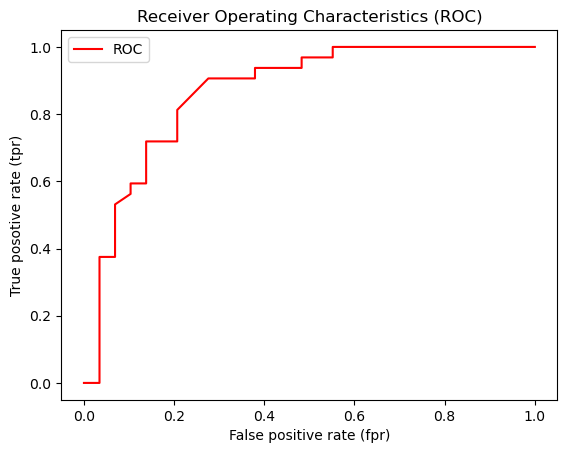

In [92]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given false positive rate (fpr)
    and true positive rate (fpr) of the model
    """
    #Plot roc curve 
    plt.plot(fpr,tpr,label='ROC',color="red")
    #Plot line with no predictive power (baseline)
   # plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")

    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True posotive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC)")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [93]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

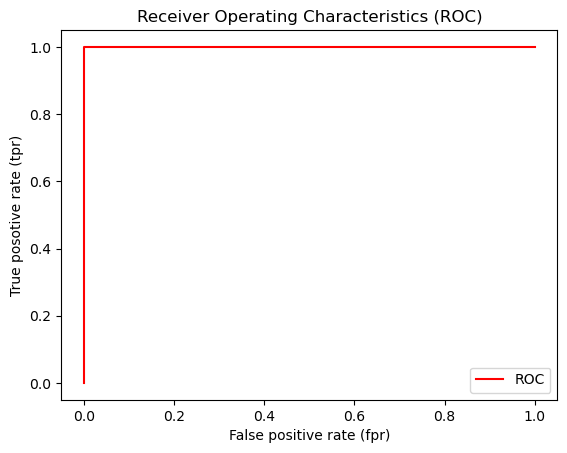

In [94]:
fpr , tpr , thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr,tpr)

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels is=t was supposed to predict

In essence goving you an idea where the model is getting confused

In [95]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [96]:
#Visualize confusion matrix with pd.crosstab

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [97]:
len(y_test)

61

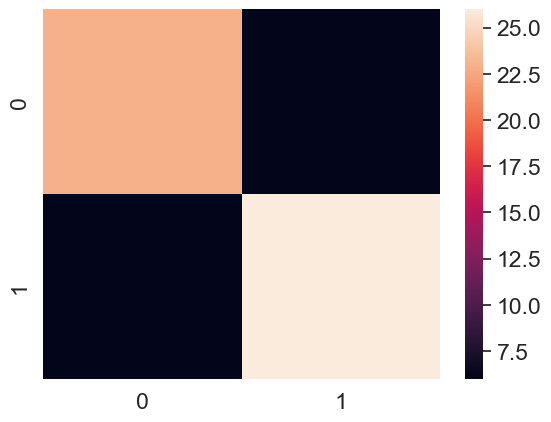

In [98]:
import seaborn as sns 

sns.set(font_scale=1.5)

conf_mat= confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

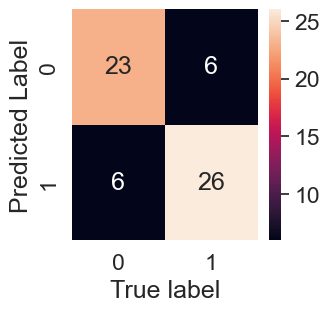

In [99]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, #Annotates the boxes with conf_mat info
                    cbar=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted Label")

plot_conf_mat(conf_mat)

**Classification Report**

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [101]:
disease_true = np.zeros(10000)

disease_true[0] = 1
disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\DELL\Desktop\Conda\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\Desktop\Conda\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\Desktop\Conda\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrixs

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 & 1 )
* **Precision** and **recall** become more important when classes are imbalanced
* If flase positive prediction are worse than false negative, aim for higher precision
* If false negative prediction are worse than false positive , aim for higher recall
* **F1-score** is combination of precision and recall

### 4.2.2 Regression Model evaluation matrix

Model evaluation metrics documentation https://scikit-learn.org/1.5/modules/model_evaluation.html

1. R^2 pronounced as r-squared or coefficient determination
2. Mean absolute error(MAE)
3. Mean squared error (MSE)

In [102]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **R^2**

What R^2 does?

Compare the model prediction to the mean of the targets. Values can range negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the target ,it's R^2 value would be 0. And if your model predicts the range of number it's R^2 value would be 1.

In [103]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston.drop("medv", axis=1)
y = boston["medv"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train);


In [104]:
model.score(X_test, y_test)

0.8654448653350507

In [105]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean 

y_test_mean = np.full(len(y_test), y_test.mean())

In [106]:
y_test.mean()

21.488235294117644

In [107]:
#if all your model does is predict the mean of the target ,it's R^2 value would be 0
r2_score(y_test , y_test_mean)

0.0

In [108]:
#if your model predicts the range of number it's R^2 value would be 1.
r2_score(y_test, y_test)

1.0

**Mean Absolute Error**

MAE is the average of the absolute differences between the predicted values and actual values. It gives you an idea how wrong your's model prediction are.

In [109]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [110]:
df = pd.DataFrame(data={'Actual Values':y_test,
                       'Predicted Values':y_preds})

df['Differences']= df['Predicted Values'] - df["Actual Values"]
df

,Actual Values,Predicted Values,Differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared Error**

In [111]:
# Mean squared error 
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [112]:
# Calculate MSE by hand
squared = np.square(df["Differences"])
squared.mean()

9.867437068627442

### 4.2.3 Using `scoring` parameter

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


clf= RandomForestClassifier()

In [114]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [115]:
# Cross validate accuracy 

print(f'The Cross Validate accuray is {np.mean(cv_acc)*100:.2f}%')

The Cross Validate accuray is 82.48%


In [116]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y,  scoring='accuracy')
print(f'The Cross Validate accuray is {np.mean(cv_acc)*100:.2f}%')

The Cross Validate accuray is 82.48%


In [117]:
#Precision

cv_precison = cross_val_score(clf, X, y,  scoring='precision')
np.mean(cv_precison)

0.8085601538512754

In [118]:
#Recall

cv_recall = cross_val_score(clf, X, y , scoring='recall')
np.mean(cv_recall)

0.8424242424242424

In [119]:
cv_f1 = cross_val_score(clf, X, y , scoring='f1')
np.mean(cv_f1)

0.841476533416832

How about our regression model??????

In [120]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston.drop('medv', axis=1)
y = boston['medv']

model = RandomForestRegressor()

In [121]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [122]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [123]:
# Mean absolute error 

cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [124]:
# Mean squared error 

cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.12863512415064

### 4.3 Evalauting the model

**Classification Model**

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

np.random.seed()

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
# Fitting the data in the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some prediction
y_preds=clf.predict(X_test)


print("Classifier metrics on test set")
print(f"Accuracy Score: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, y_preds)}")
print(f"Recall Score: {recall_score(y_test, y_preds)}")
print(f"F1-SCORE: {f1_score(y_test, y_preds)}")

Classifier metrics on test set
Accuracy Score: 80.33%
Precision Score: 0.8571428571428571
Recall Score: 0.75
F1-SCORE: 0.8


**Regression Model**

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

np.random.seed()

# Importing the data 
X = boston.drop("medv", axis=1)
y = boston["medv"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

#Fitting the data in the model

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds=model.predict(X_test)

# Evalute the regression model
print("Regression metrics on test set")
print(f"Acuracy: {model.score(X_test, y_test)*100:.2f}%")
print(f"R2-score:{r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on test set
Acuracy: 83.04%
R2-score:0.830392538263385
MAE: 2.159186274509805
MSE: 11.604426460784328


## Improving the Model

* First Prediction = baseline prediction
* First Model = baseline Model


**From a data perspective:**
  
* Could we collect more data???
* Could we improve our data???


**From a model perspective:**
  
* Is there a better model we could use??
* Could we improve our current model???


**Parameters vs HyperParameters**

* Parameters: model find these pattern in data
* Hypermeters: setting on model you can adjust to (potentially) improve its ability to find patterns


**Three ways to adjust hyperparameters**

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV
  

### 5.1. Tuning Hyperparameters by hand

Let's make three sets training, validation, test

In [127]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust

* `max-depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`


In [128]:
def evalaute_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true label vs v_preds label on a classification
    """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metric_dict = {"accuracy": round(accuracy,2),
                   "precision": round(precision,2),
                   "recall": round(recall,2),
                   "f1": round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f} %")
    print(f"Precison: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score:{f1:.2f} ")

    return metric_dict

In [131]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train , y_train = X[:train_split], y[:train_split]
X_valid , y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test , y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evalaute_preds(y_valid, y_preds)
baseline_metrics


Acc: 82.22 %
Precison: 0.81
Recall: 0.88
F1-score:0.85 


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [152]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

clf_2 = RandomForestClassifier(n_estimators=60);
clf_2.fit(X_train, y_train)

clf_2_y_preds = clf_2.predict(X_test)

clf_2_metrics = evalaute_preds(y_test, clf_2_y_preds)
clf_2_metrics

Acc: 80.33 %
Precison: 0.77
Recall: 0.82
F1-score:0.79 


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.82, 'f1': 0.79}

### 5.2.Hyperparameter tuning with RandomizedSearchCV

In [133]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":['auto', 'sqrt'],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]
       }

clf = RandomForestClassifier(n_jobs=1)

rs_clf= RandomizedSearchCV(estimator =clf,
                          param_distributions=grid,
                          n_iter=10,
                          cv=5,
                          verbose=2)

rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1

C:\Users\DELL\Desktop\Conda\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\Desktop\Conda\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\Desktop\Conda\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\Desktop\Conda\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\D

In [138]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [139]:
# Make prediction with best parameters

rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evalaute_preds(y_test, rs_y_preds)

Acc: 82.61 %
Precison: 0.84
Recall: 0.84
F1-score:0.84 


### 5.3.HyperParameter tuning with GridSearchCV

In [141]:
grid_2= {"n_estimators":[10,50,100],
        "max_depth":[30],
        "max_features":['sqrt'],
        "min_samples_split":[2,4],
        "min_samples_leaf":[1]
       }

In [143]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

# Split into X and y

X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

#Splitting into train and test 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

#Insantiatie the RandomForestClassifier

clf = RandomForestClassifier()

gs_clf = GridSearchCV(estimator =clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2)

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total t

In [144]:
#Making some prediction
gs_y_preds = gs_clf.predict(X_test)

#Evaluate the metrics

gs_metrics = evalaute_preds(y_test, gs_y_preds)

Acc: 78.69 %
Precison: 0.71
Recall: 0.89
F1-score:0.79 


Let's compare our different model and visualize  

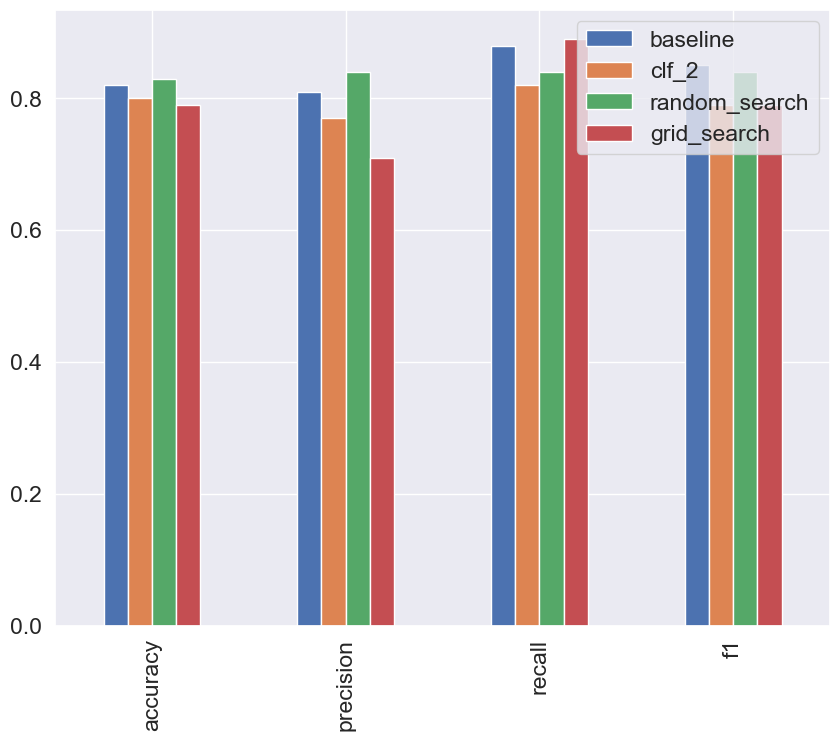

In [155]:
compare_metric = pd.DataFrame({"baseline":baseline_metrics,
                               "clf_2":clf_2_metrics,
                               "random_search":rs_metrics,
                               "grid_search":gs_metrics
                              })

compare_metric.plot.bar(figsize=(10,8));

## Saving and loading trained machine learning model

Two ways to save and load machine learning model

1. With Python's `pickle` module
2. With Python's `joblib` module

In [156]:
import pickle

# Save an existing machine learning models to file 

pickle.dump(gs_clf, open("gs_random_forest_model_heart_disease.pkl","wb"))

In [157]:
loaded_pickle_model = pickle.load(open("gs_random_forest_model_heart_disease.pkl","rb"))

In [159]:
# Make some prediction

pickle_y_preds = loaded_pickle_model.predict(X_test)

evalaute_preds(y_test, pickle_y_preds)


Acc: 78.69 %
Precison: 0.71
Recall: 0.89
F1-score:0.79 


{'accuracy': 0.79, 'precision': 0.71, 'recall': 0.89, 'f1': 0.79}

In [160]:
from joblib import dump, load

# Save model to the file 

dump(gs_clf, filename = "gs_random_forest.joblib")

['gs_random_forest.joblib']

In [161]:
loaded_job_model= load(filename="gs_random_forest.joblib")

In [163]:
joblib_y_preds = loaded_job_model.predict(X_test)
evalaute_preds(y_test, joblib_y_preds)

Acc: 78.69 %
Precison: 0.71
Recall: 0.89
F1-score:0.79 


{'accuracy': 0.79, 'precision': 0.71, 'recall': 0.89, 'f1': 0.79}